In [38]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

np.__version__,pd.__version__,sklearn.__version__,matplotlib.__version__

('1.19.1', '1.2.4', '0.24.2', '3.2.2')

In [18]:
# Dataset capturado do desafio https://www.kaggle.com/volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary
df = pd.read_csv('../data/fraud_detection_bank_dataset.csv',index_col=0)

# Binarização simples dos dados categóricos
#df = df.join(pd.get_dummies(df.select_dtypes('object'))).drop(df.select_dtypes('object').columns,axis=1)


In [19]:
display(df)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,9,1354,0,18,0,1,7,9,0,0,...,0,0,0,1,1,0,0,0,49,1
1,0,239,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,0,260,0,4,0,3,6,0,0,0,...,0,0,0,1,1,0,0,0,56,1
3,17,682,0,1,0,0,8,17,0,0,...,0,1,0,1,1,0,0,0,65,1
4,1,540,0,2,0,1,7,1,0,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,0,134,0,2,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,4,393,1,1,0,0,-1,4,0,0,...,0,1,0,0,0,0,0,0,45,0
20466,0,10,0,1,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,5,0


In [20]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
col_0,20468.0,3.226256,20.564308,0.0,0.0,0.0,2.00,2301.0
col_1,20468.0,294.793043,717.541984,0.0,38.0,97.0,283.00,37808.0
col_2,20468.0,0.420021,7.367275,0.0,0.0,0.0,0.00,904.0
col_3,20468.0,2.329343,10.068512,0.0,0.0,1.0,2.00,772.0
col_4,20468.0,0.083594,0.840537,0.0,0.0,0.0,0.00,54.0
...,...,...,...,...,...,...,...,...
col_108,20468.0,0.000049,0.006990,0.0,0.0,0.0,0.00,1.0
col_109,20468.0,0.049345,0.216593,0.0,0.0,0.0,0.00,1.0
col_110,20468.0,0.024282,0.305079,0.0,0.0,0.0,0.00,17.0
col_111,20468.0,43.486125,59.217560,0.0,5.0,19.0,61.25,747.0


In [62]:
model = LogisticRegression(max_iter=1000)
X = StandardScaler().fit_transform(df.drop('targets',axis=1))
y = df.targets.to_numpy().reshape(-1)

In [63]:
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [64]:
y_pred = model.predict(X)
mean_squared_error(y,y_pred)

0.11774477232753566

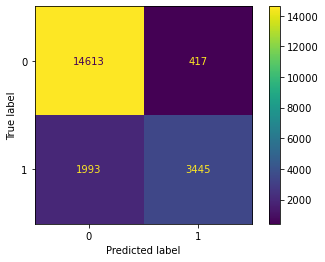

In [65]:
ConfusionMatrixDisplay(confusion_matrix(y,y_pred)).plot()

In [85]:
model.intercept_ , model.coef_

(array([-2.01901032]),
 array([[ 1.50136895e-01,  8.71646386e-01, -3.80341749e+00,
         -4.41167071e+00, -5.92083423e-02, -2.22221587e-01,
          1.17563797e-01,  1.50136895e-01,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.55082381e-01, -4.61679467e-01,
         -4.93808975e-02,  2.71364259e-01, -5.34895547e-03,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -4.09774367e-01, -4.29036238e-01,
          2.43975547e+00, -6.68889123e-01, -4.76535893e-01,
          9.10938945e-02,  3.82647503e-02,  1.63039601e-01,
          4.53051202e-02, -2.21873318e-01,  2.34080934e-03,
         -5.06954409e-02,  6.17475391e-02,  0.00000000e+00,
          4.52920295e-01, -6.04269475e-01, -4.45951081e-02,
          5.97840864e-02, -2.87392970e-01, -2.36343493e-02,
         -1.60380095e-01, -3.25436694e-01, -1.06826231e+00,
         -2.47669039e-01,  8.23181947e-03,  1.77815322e+00,
         -1.12900

Wall time: 3.53 s


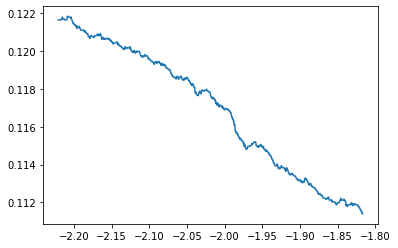

In [94]:
%%time
intcpt = model.intercept_[0]
delta =  0.1*intcpt # delta de 10%
intcpt_array = np.linspace(intcpt-delta,intcpt+delta,1000)
mse_array = []
for i in intcpt_array:
    model.intercept_ = np.array([i])
    y_aux = model.predict(X)
    mse_array.append(mean_squared_error(y,y_aux))
    
mse_array = np.array(mse_array)
model.intercept_ = np.array([intcpt])

plt.plot(intcpt_array,mse_array)

Wall time: 3.86 s


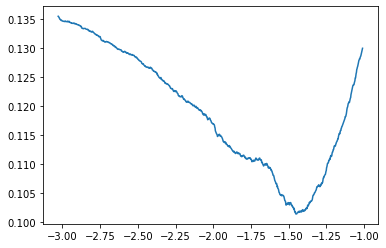

In [95]:
%%time
intcpt = model.intercept_[0]
delta =  0.5*intcpt # delta de 50%
intcpt_array = np.linspace(intcpt-delta,intcpt+delta,1000)
mse_array = []
for i in intcpt_array:
    model.intercept_ = np.array([i])
    y_aux = model.predict(X)
    mse_array.append(mean_squared_error(y,y_aux))
    
mse_array = np.array(mse_array)
model.intercept_ = np.array([intcpt])

plt.plot(intcpt_array,mse_array)

Wall time: 3.7 s


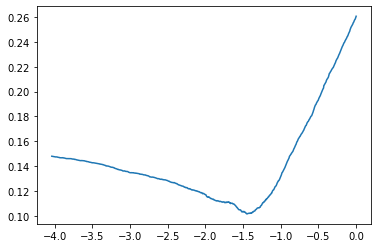

In [96]:
%%time
intcpt = model.intercept_[0]
delta =  1*intcpt # delta de 100%
intcpt_array = np.linspace(intcpt-delta,intcpt+delta,1000)
mse_array = []
for i in intcpt_array:
    model.intercept_ = np.array([i])
    y_aux = model.predict(X)
    mse_array.append(mean_squared_error(y,y_aux))
    
mse_array = np.array(mse_array)
model.intercept_ = np.array([intcpt])

plt.plot(intcpt_array,mse_array)

Wall time: 3.34 s


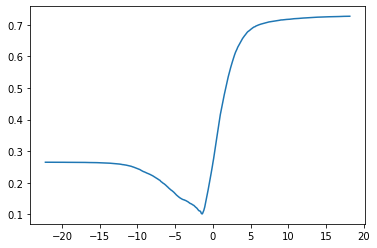

In [97]:
%%time
intcpt = model.intercept_[0]
delta =  10*intcpt # delta de 1000%
intcpt_array = np.linspace(intcpt-delta,intcpt+delta,1000)
mse_array = []
for i in intcpt_array:
    model.intercept_ = np.array([i])
    y_aux = model.predict(X)
    mse_array.append(mean_squared_error(y,y_aux))
    
mse_array = np.array(mse_array)
model.intercept_ = np.array([intcpt])

plt.plot(intcpt_array,mse_array)